In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Load the dataset
url = '/content/drive/MyDrive/Algerian_forest_fires_cleaned.csv'
data = pd.read_csv(url)

In [52]:
# Displaying the first few rows of the dataset
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [54]:
# Checking Stastical Summary of data
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [55]:
# Data Cleaning and Preprocessing
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


The Algerian Forest Fire Dataset do not have any missing values.

In [56]:
# Checking for the Duplicates
data.duplicated().sum()

0

There are not any duplicate data in the dataset

In [57]:
# Checking for the unique values in Classes column
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

There are white Spaces in Classes Categories names. Removing white Spaces in next cell.

In [58]:
# Removing whitespaces from Classes categories
data['Classes'] = data['Classes'].str.replace(pat=' +', repl='', regex=True)
data['Classes'].unique()

array(['notfire', 'fire'], dtype=object)

In [59]:
# Encode Class Labels
le = LabelEncoder()
data['Classes'] = le.fit_transform(data['Classes'])

data.head(7)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,0


In [60]:
# Get the mapping between classes and labels
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print(label_mapping)

{'fire': 0, 'notfire': 1}


In [61]:
# Check Year column for unique values
data['year'].unique()

array([2012])

In [62]:
# Drop year columns as all data is for same year
data.drop('year', axis=1, inplace=True)

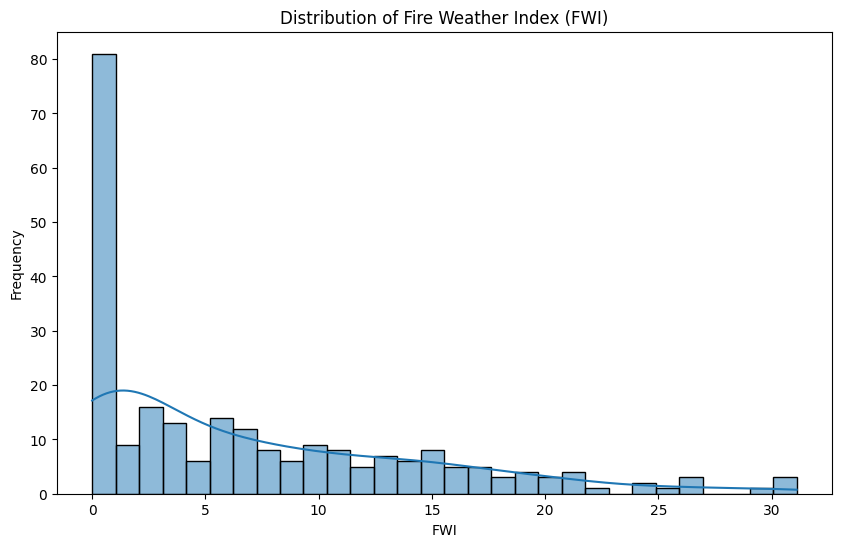

In [63]:
# Univariate Analysis
# Visualize the distribution of Fire Weather Index (FWI)
plt.figure(figsize=(10, 6))
sns.histplot(data['FWI'], bins=30, kde=True)
plt.title('Distribution of Fire Weather Index (FWI)')
plt.xlabel('FWI')
plt.ylabel('Frequency')
plt.show()

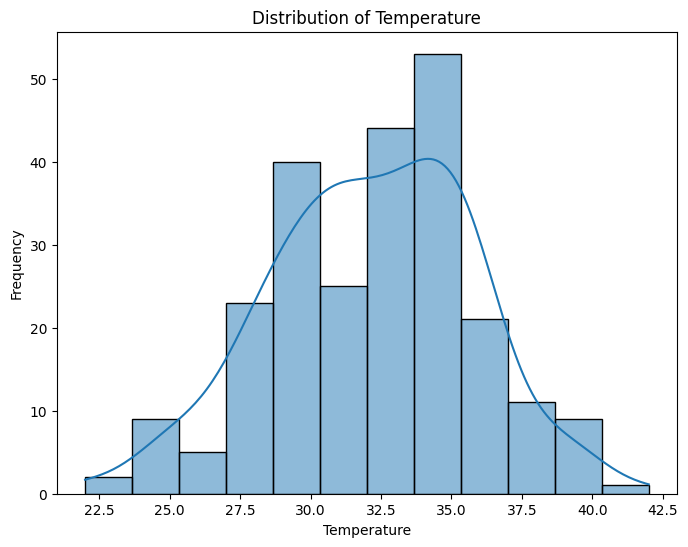

In [64]:
# Univariate Analysis
# For numerical features:
# Distribution of Temperature
plt.figure(figsize=(8, 6))
sns.histplot(data['Temperature'], bins=12, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

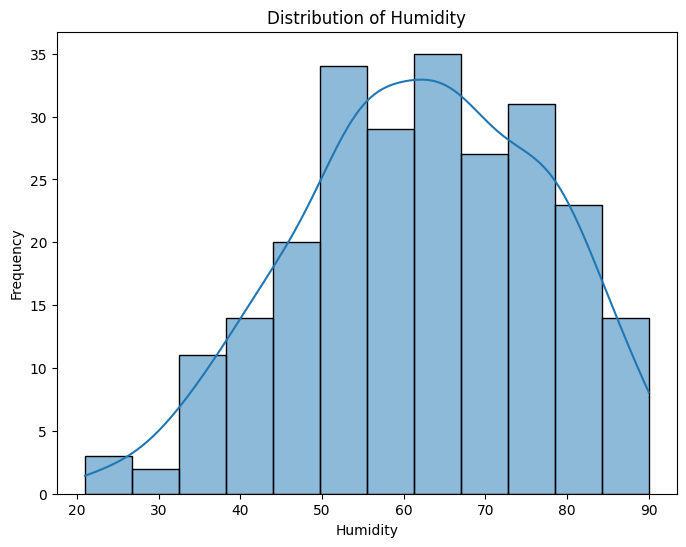

In [65]:
# Distribution of Humidity
plt.figure(figsize=(8, 6))
sns.histplot(data['RH'], bins=12, kde=True)
plt.title('Distribution of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

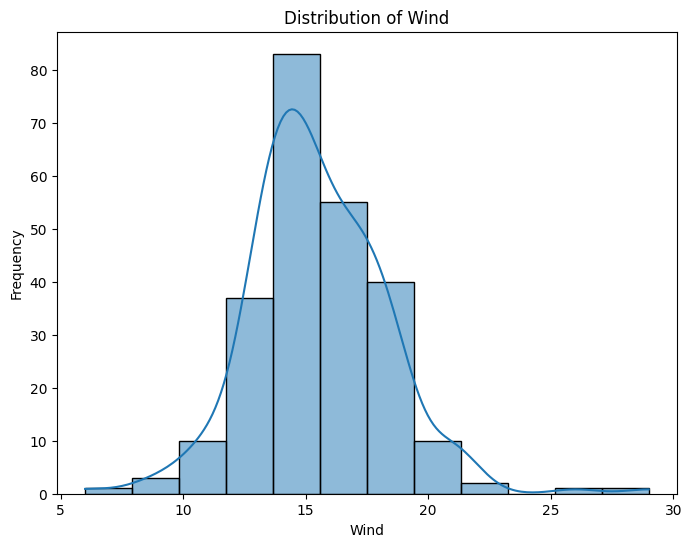

In [66]:
#  Wind Speed Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data['Ws'], bins=12, kde=True)
plt.title('Distribution of Wind')
plt.xlabel('Wind')
plt.ylabel('Frequency')
plt.show()

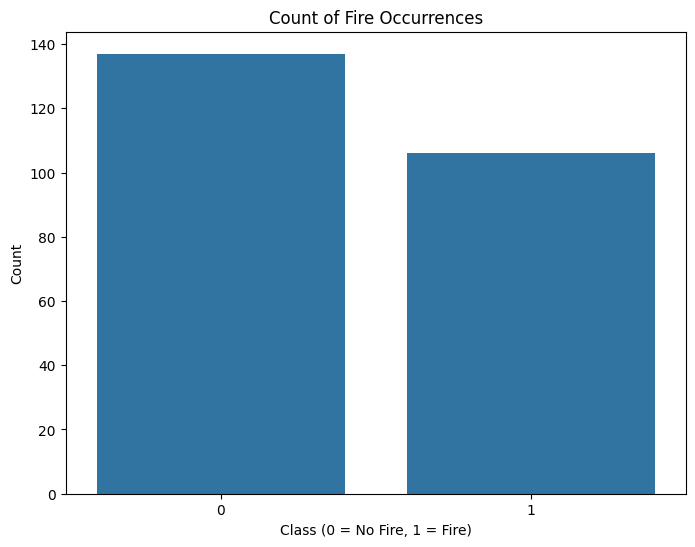

In [67]:
# For categorical features:
# Count plot of Fire vs No fire
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Classes'])
plt.title('Count of Fire Occurrences')
plt.xlabel('Class (0 = No Fire, 1 = Fire)')
plt.ylabel('Count')
plt.show()

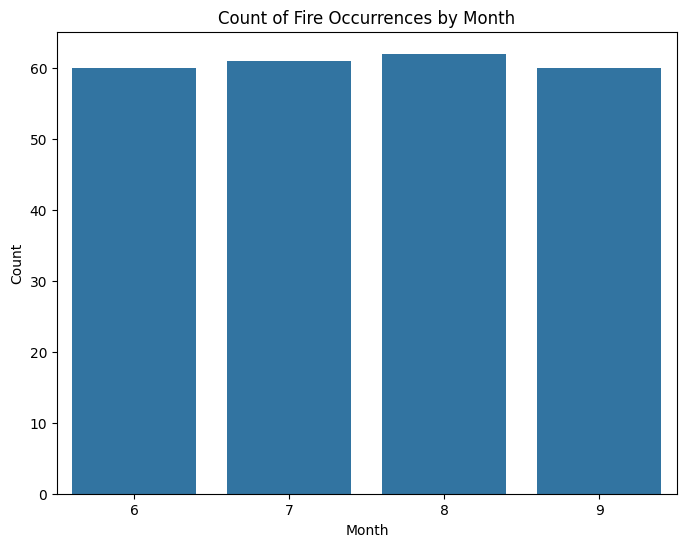

In [68]:
# Count plot of Month
plt.figure(figsize=(8, 6))
sns.countplot(x=data['month'])
plt.title('Count of Fire Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

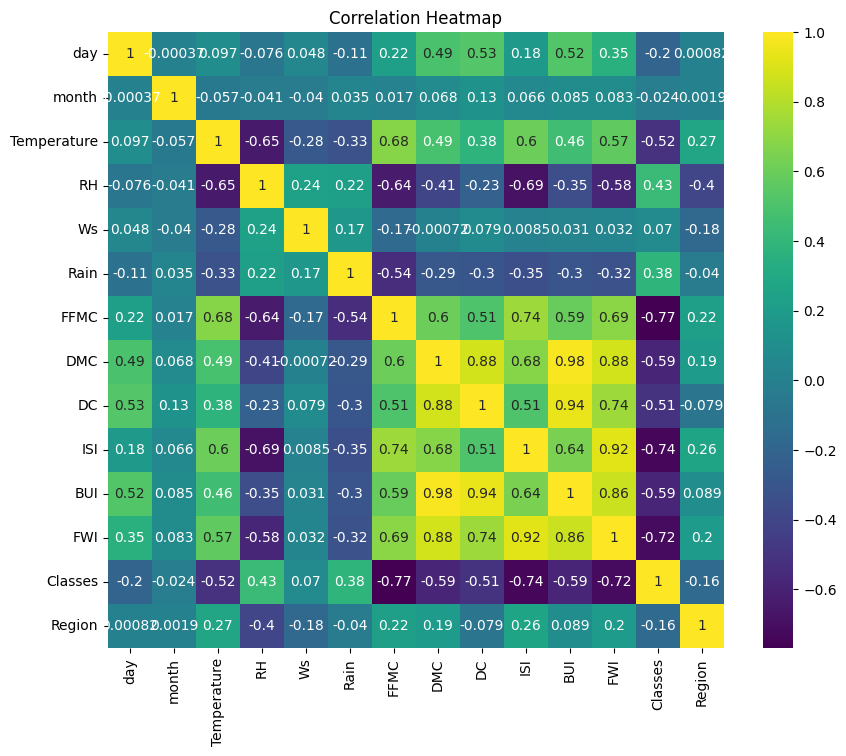

In [69]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Correlations of  "Classes" column with other features

**Classes vs. RH (Relative Humidity)**: -0.58 This negative correlation indicates that as relative humidity increases, the chances of fire decrease. This is intuitive, as higher humidity makes it harder for fires to start and spread.

**Classes vs. Rain:** 0.38 This positive correlation suggests that as rainfall increases, the chances of fire decrease. Again, this makes sense because rain would extinguish existing fires and make it harder for new fires to start.

**Classes vs. FFMC (Fine Fuel Moisture Code):** -0.77 This strong negative correlation indicates a strong inverse relationship between fine fuel moisture content and the chance of fire. As fine fuel moisture content increases, the chances of fire decrease. This is because moisture in fuel makes it harder to ignite.

**Classes vs. DMC (Duff Moisture Code):** -0.59 Similar to FFMC, this negative correlation indicates that as the moisture content of the organic layer of the soil increases, the chances of fire decrease.

**Classes vs. DC (Drought Code):** -0.51 This negative correlation suggests that as the drought code increases (indicating drier conditions), the chances of fire increase.

**Classes vs. ISI (Initial Spread Index):** -0.74 This strong negative correlation shows that the ISI, which measures the potential spread rate of a fire, is inversely related to the chances of fire. This means that a higher ISI indicates a higher risk of fire.

**Classes vs. BUI (Buildup Index):** -0.59 This negative correlation indicates that the BUI, which measures the amount of fuel available for a fire, is inversely related to the chances of fire. This means that a higher BUI indicates a higher risk of fire.

**Classes vs. FWI (Fire Weather Index):** -0.72 This strong negative correlation shows a strong inverse relationship between the FWI, which combines various weather factors into a single index to represent fire danger, and the chances of fire. A higher FWI indicates a higher fire danger.

**Classes vs. Temperature:** 0.27 This weak positive correlation suggests that as temperature increases, the chances of fire slightly increase. However, the relationship is not strong, indicating that temperature alone may not be a significant factor in determining fire occurrence.

**Classes vs. Month: 0.0019** This negligible correlation indicates that the month of the year has almost no influence on the chances of fire, suggesting that seasonal variations may not play a significant role in fire occurrence in this dataset.

**Classes vs. Day:** -0.0008 This negligible correlation indicates that the specific day of the month has almost no influence on the chances of fire, further supporting the idea that daily variations do not significantly affect fire occurrence.



**Correlations between other variables:**

**DMC vs. DC:** 0.88 This strong positive correlation indicates that as the duff moisture content increases, the drought code also increases, suggesting that both measures are related to moisture levels in the environment.

**DMC vs. ISI:** 0.68 This strong positive correlation indicates that higher duff moisture content is associated with higher initial spread index values, suggesting that moisture levels can influence fire spread potential.

**DMC vs. BUI:** 0.98 This very strong positive correlation indicates that as duff moisture content increases, the buildup index also increases, suggesting a close relationship between these two measures of fuel moisture.

**DC vs. ISI: 0.75** This strong positive correlation indicates that as the drought code increases, the initial spread index also increases, suggesting that drier conditions lead to a higher potential for fire spread.

**DC vs. BUI: 0.85** This strong positive correlation indicates that as the drought code increases, the buildup index also increases, suggesting that drier conditions lead to more available fuel for fires.

**ISI vs. BUI: 0.82** This strong positive correlation indicates that as the initial spread index increases, the buildup index also increases, suggesting that higher potential for fire spread is associated with more available fuel.

In [70]:
# Dropping Month,Ws and Day columns as they have negligible impact on chances of fire
data.drop(['month', 'Ws','day'], axis=1, inplace=True)

In [75]:
# Split features and target variable
x = data.drop('Classes', axis=1)
y = data['Classes']

In [76]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [77]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((194, 10), (49, 10), (194,), (49,))

In [79]:
# Data Normalization or scaling for faster convergence and removing larger feature dominance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled =scaler.transform(x_test)

In [82]:
# Model Development and Analysis

# Import necessary libraries (if not already imported)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Define a wider hyperparameter space
param_dist = {
    'C': uniform(loc=0, scale=4),  # Regularization strength (using uniform distribution)
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers to try
}

# Create StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # 10 folds, shuffled

# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(
    log_reg, param_distributions=param_dist, n_iter=100, cv=cv, scoring='accuracy', random_state=42, n_jobs=-1
)

# Fit the model with RandomizedSearchCV
random_search.fit(x_train_scaled, y_train)  # Use scaled data

# Best parameters from RandomizedSearchCV
print("Best parameters:", random_search.best_params_)

# Evaluate the model
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)  # Use scaled data for prediction


Best parameters: {'C': 0.7986951286334389, 'penalty': 'l1', 'solver': 'saga'}


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        27
           1       0.95      0.95      0.95        22

    accuracy                           0.96        49
   macro avg       0.96      0.96      0.96        49
weighted avg       0.96      0.96      0.96        49



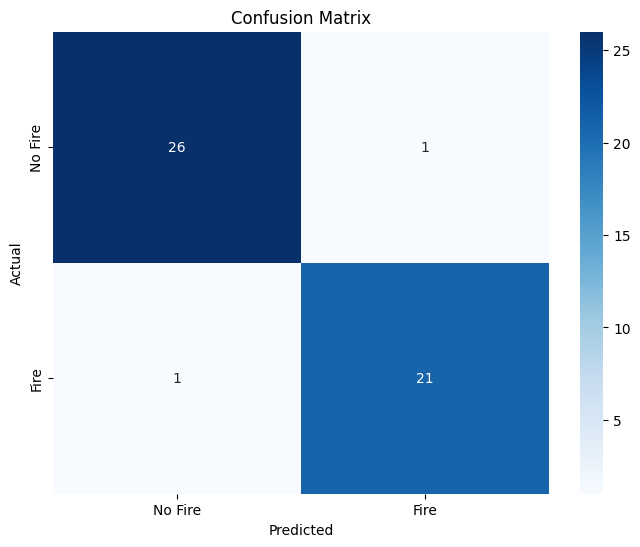

In [83]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [84]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.96


In [86]:
# Save the model using pickle
with open('AFF_logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [101]:
# testing on  unseen data
new_data = pd.read_csv("/content/Algerian_data_unseen.csv")
new_data.head()

,Temperature,RH,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,22.564412,31.945742,-4.142444,99.981586,-20.825959,374.128513,3.132443,48.760721,53.036699,1
1,22.442756,170.525826,24.092224,68.947324,57.575557,-346.953597,-15.249149,55.208525,-30.513263,0
2,25.963418,43.989729,23.823826,101.193804,35.558668,177.795093,-22.491897,63.369348,29.860346,0
3,24.738659,29.964239,25.040350,89.784468,10.953061,-608.102874,1.809348,64.691850,45.947139,0
4,26.293248,84.532155,25.809655,59.627110,10.548033,9.173346,-5.708246,-51.752888,4.819873,0


In [106]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# Load the saved model
with open('/content/AFF_logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the new unseen data
new_data = pd.read_csv("/content/Algerian_data_unseen.csv")

# Assuming 'Classes' is the target variable column, drop it if it exists
if 'Classes' in new_data.columns:
    new_data = new_data.drop('Classes', axis=1)

# Strip any leading/trailing spaces from column names in both datasets
data.columns = data.columns.str.strip()  # Assuming 'data' is your original training DataFrame
new_data.columns = new_data.columns.str.strip()

# **IMPORTANT FIX**: You need to fit the scaler to your original training data, not the new data.
# Assuming 'data' is your original training DataFrame
# If not, replace 'data' with the correct variable name
scaler = StandardScaler()
scaler.fit(data.drop('Classes', axis=1)) # Fit on training data features (excluding target)

# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions on the scaled new data
predictions = loaded_model.predict(new_data_scaled)
final_predictions = le.inverse_transform(predictions)

# Print the predictions
print("Predictions for new data:")
print(final_predictions)

Predictions for new data:
['fire' 'notfire' 'notfire' 'notfire' 'notfire' 'notfire' 'fire' 'notfire'
 'notfire' 'fire' 'notfire' 'fire' 'notfire' 'notfire' 'fire' 'fire'
 'fire' 'fire' 'notfire' 'fire' 'fire' 'fire' 'fire' 'notfire' 'fire'
 'fire' 'fire' 'fire' 'fire' 'notfire' 'notfire' 'fire' 'notfire'
 'notfire' 'fire' 'notfire' 'fire' 'fire' 'fire' 'notfire' 'fire' 'fire'
 'notfire' 'notfire' 'notfire' 'fire' 'fire' 'fire' 'notfire' 'fire']
